In [4]:
string123 = ['hello', 'mam', 'why']
', '.join(string123)

'hello, mam, why'

In [9]:
import string # had to define manually as I accidentally used this for variable name
a  = string.punctuation
a

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
import numpy as np
dataset = [
    {'customer_id': 1, 'search_count': 2, 'review_date': '2018-01-05'},
    {'customer_id': 12, 'search_count': 9, 'review_date': '2018-03-05'},
    {'customer_id': 2, 'search_count': -1, 'review_date': -1},
    {'customer_id': 3, 'search_count': -1, 'review_date': '2018-05-05'},
    {'customer_id': 5, 'search_count': -1, 'review_date': ''},
    {'customer_id': 6, 'search_count': -1, 'review_date': ' '},
]

In [33]:
for d in dataset:
    d['year'] = int(d['review_date'][:4])
# you will get this error if data is not treated for missing or bad data

TypeError: 'int' object is not subscriptable

In [26]:
filtered_data = [d for d in dataset if d['review_date'] != -1 and d['review_date'] != '' and 
                 d['review_date'] != ' ']
filtered_data

[{'customer_id': 1,
  'search_count': 2,
  'review_date': '2018-01-05',
  'year': 2018},
 {'customer_id': 12,
  'search_count': 9,
  'review_date': '2018-03-05',
  'year': 2018},
 {'customer_id': 3, 'search_count': 9, 'review_date': '2018-05-05'}]

In [40]:
def preprocess(dataset, field):
    
    filtered_data = [d for d in dataset if d[field] != -1 and d[field] != '' and 
                 d[field] != ' ']
    print(filtered_data)
    return filtered_data

data_filt = preprocess(dataset, 'review_date')
for d in data_filt:
    d['year'] = int(d['review_date'][:4])
    print(d['year'], d['customer_id'])

[{'customer_id': 1, 'search_count': 2, 'review_date': '2018-01-05', 'year': 2018}, {'customer_id': 12, 'search_count': 9, 'review_date': '2018-03-05', 'year': 2018}, {'customer_id': 3, 'search_count': -1, 'review_date': '2018-05-05'}]
2018 1
2018 12
2018 3


In [89]:
def preprocess_removepunc(str_list):
    removed_word = ''
    for word in str_list: 
        c = ''.join(letter for letter in word if letter not in string.punctuation)
        removed_word = removed_word +' ' + c
    return removed_word.lower()

sample_str1 = ['hello,', 'world!', 'abc$']
sample_str2 = ['teSt...', 'Me....', 'plEase.']

print (preprocess_removepunc(sample_str1))
print (preprocess_removepunc(sample_str2))

 hello world abc
 test me please


In [91]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [103]:
dataset = [
    {'customer_id':1, 'review_date' : '2016-01-05', 'last_updated': '2017-01-06', 'review': 'very good place', 'stars': 5},
    {'customer_id':2, 'review_date' : '2018-01-06', 'last_updated': '2018-01-05', 'review': 'very good place', 'stars': 3},
    {'customer_id':3, 'review_date' : '2019-01-06' , 'last_updated': '2018-01-05', 'review': 'very good place', 'stars': 3.5},
    {'customer_id':4, 'review_date' : '2017-01-08', 'last_updated': '2018-01-05', 'review': 'very good place', 'stars': 4},
    {'customer_id':4, 'review_date' : '2016-01-01', 'last_updated': '2018-01-05', 'review': 'very horrible place', 'stars': 1},
    {'customer_id':4, 'review_date' : '2018-01-02', 'last_updated': '2018-01-05', 'review': 'very bad place', 'stars': 2},
    {'customer_id':2, 'review_date' : '2019-01-03', 'last_updated': '2018-01-05', 'review': '', 'stars': 1},
    {'customer_id':3, 'review_date' : '2019-01-05', 'last_updated': '2018-01-05', 'review': '', 'stars': 2},
    {'customer_id':1, 'review_date' : '2017-01-06', 'last_updated': '2017-02-05', 'review': '', 'stars': 3},
    {'customer_id':1, 'review_date' : '2017-01-08', 'last_updated': '2017-02-05', 'review': 'very good place', 'stars': 3},
    {'customer_id':5, 'review_date' : '2019-01-08', 'last_updated': '2019-02-05', 'review': 'very good place', 'stars': 5}
]

In [104]:
import time

timelist = []
for d in dataset :
    
    d['timeobj'] = time.strptime(d['review_date'], "%Y-%m-%d")
    d['timeInt'] = time.mktime(d['timeobj'])
    timelist.append(d)



In [105]:
timelist[0]

{'customer_id': 1,
 'review_date': '2016-01-05',
 'last_updated': '2017-01-06',
 'review': 'very good place',
 'stars': 5,
 'timeobj': time.struct_time(tm_year=2016, tm_mon=1, tm_mday=5, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=5, tm_isdst=-1),
 'timeInt': 1451973600.0}

In [106]:
from collections import defaultdict
week_ratings = defaultdict(list)

for d in timelist:
    dow = d['timeobj'].tm_wday
    week_ratings[dow].append(d['stars'])

print(week_ratings)

defaultdict(<class 'list'>, {1: [5, 2, 5], 5: [3, 2], 6: [3.5, 4, 3], 4: [1, 3], 3: [1]})


In [109]:
week_avg = {}
for d in week_ratings:
    week_avg[d] = sum(week_ratings[d])/len(week_ratings[d])
    
week_avg

{1: 4.0, 5: 2.5, 6: 3.5, 4: 2.0, 3: 1.0}

[1, 3, 4, 5, 6] [4.0, 1.0, 2.0, 2.5, 3.5]


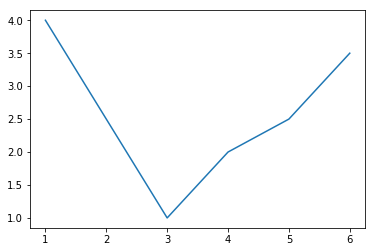

In [119]:
import matplotlib.pyplot as plt
X = sorted(week_avg.keys())
y = [week_avg[x] for x in X]
print(X,y)
plt.plot(X,y)

<BarContainer object of 5 artists>

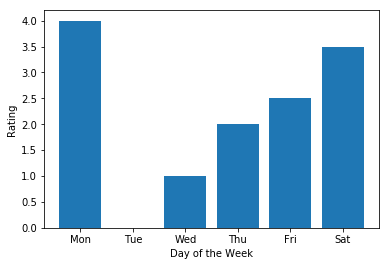

In [121]:
plt.xlabel("Day of the Week")
plt.ylabel("Rating")
plt.xticks([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
plt.autoscale()
plt.bar(X,y)